In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import norm, lognorm, uniform, expon

In [2]:
x = np.linspace(-10*np.e, 10*np.e, 100)
y_true = np.arcsinh(x)

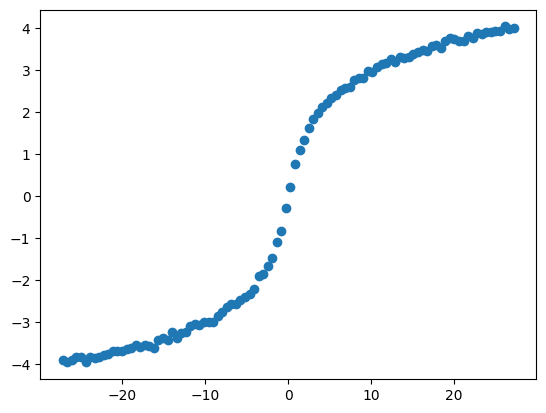

In [5]:
y_noise = y_true.copy()

np.random.seed(0)
y_noise = y_noise + np.random.normal(0, .05, 100)

plt.scatter(x, y_noise)

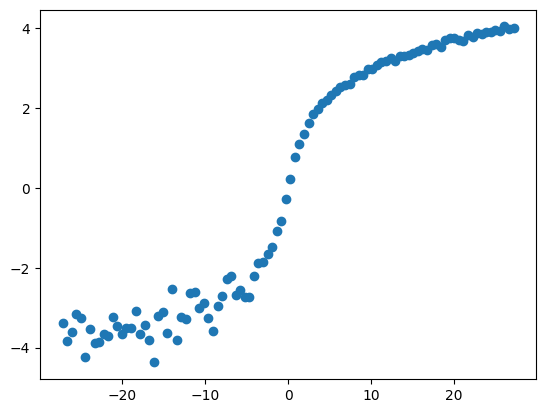

In [6]:
y_aleatoric = y_noise.copy()

np.random.seed(0)
y_aleatoric[0:42] = y_aleatoric[0:42] + np.random.normal(0, .3, 42)

plt.scatter(x, y_aleatoric)

In [7]:
y_aleatoric1 = y_true.copy()
y_aleatoric2 = y_true.copy()
y_aleatoric3 = y_true.copy()
y_aleatoric4 = y_true.copy()
y_aleatoric5 = y_true.copy()

np.random.seed(0)

h = np.sort(np.random.normal(1, .5, 42))
t = 2 * np.sort(np.random.normal(1, .5, 30))
u = np.sort(np.random.normal(.7, .2, 30))

y_aleatoric1[0:42] = y_true[0:42] + h[::-1]
y_aleatoric1[-30:] = y_true[-30:] + t

y_aleatoric2[0:42] = y_true[0:42] - h[::-1]
y_aleatoric2[-30:] = y_true[-30:] - t

y_aleatoric3[0:42] = y_true[0:42] + np.random.normal(0, .5, 42) + (y_true[0:42]/20)
y_aleatoric3[-30:] = y_true[-30:] + np.random.normal(0, .5, 30) + u

y_aleatoric4[0:42] = y_true[0:42] + np.random.normal(0, .5, 42) + (y_true[0:42]/20)
y_aleatoric4[-30:] = y_true[-30:] + np.random.normal(0, .5, 30) + u

y_aleatoric5[0:42] = y_true[0:42] + np.random.normal(0, .5, 42) + (y_true[0:42]/20)
y_aleatoric5[-30:] = y_true[-30:] + np.random.normal(0, .5, 30) + u

<AxesSubplot: xlabel='x', ylabel='y_reg'>

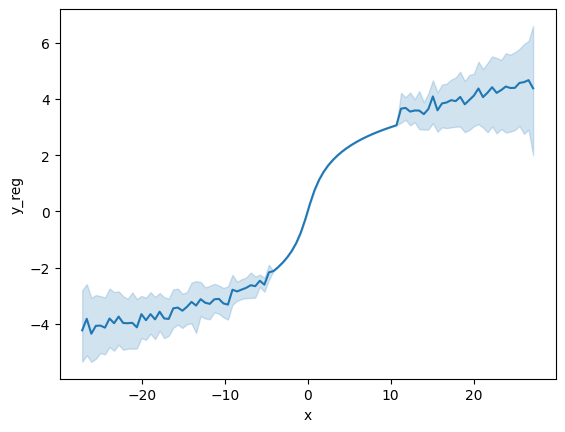

In [8]:
y_reg = np.concatenate([
    y_aleatoric1, y_aleatoric2, y_aleatoric3, y_aleatoric4, y_aleatoric5
])

data = pd.DataFrame({
    "x": np.concatenate([x,x,x,x,x]),
    "y_reg": y_reg
})

sns.lineplot(data=data, x="x", y="y_reg")

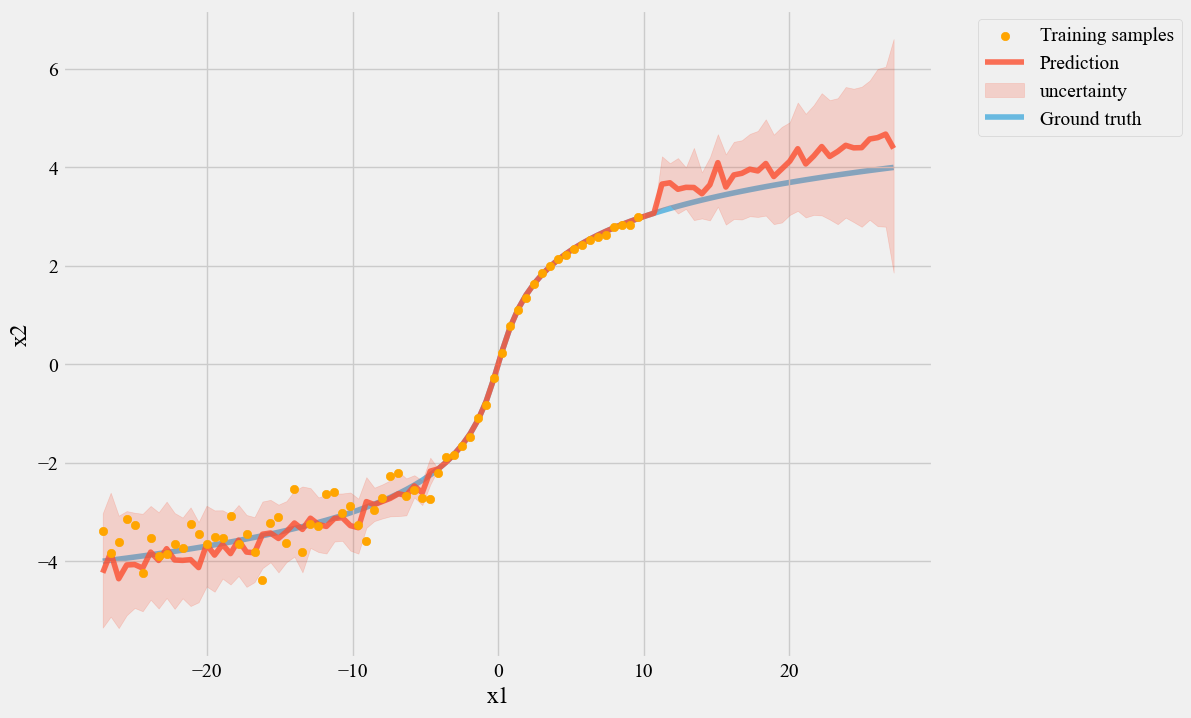

In [20]:
plt.rcParams['font.size'] = '10'
plt.style.use('fivethirtyeight')

_ = plt.figure(figsize=(10, 8))

plt.scatter(x[:-32], y_aleatoric[:-32], color="orange", label="Training samples", zorder=10)
sns.lineplot(data=data, x="x", y="y_reg", color="#fc4f30", label="Prediction", alpha=.8, zorder=5, err_kws={"label":"uncertainty", "alpha":.2})
plt.plot(x, y_true, label="Ground truth", color="#30a2da", alpha=.7, zorder=0)

_ = plt.xlabel("x1")
_ = plt.ylabel("x2")
_ = plt.legend(bbox_to_anchor=(1.04, 1))

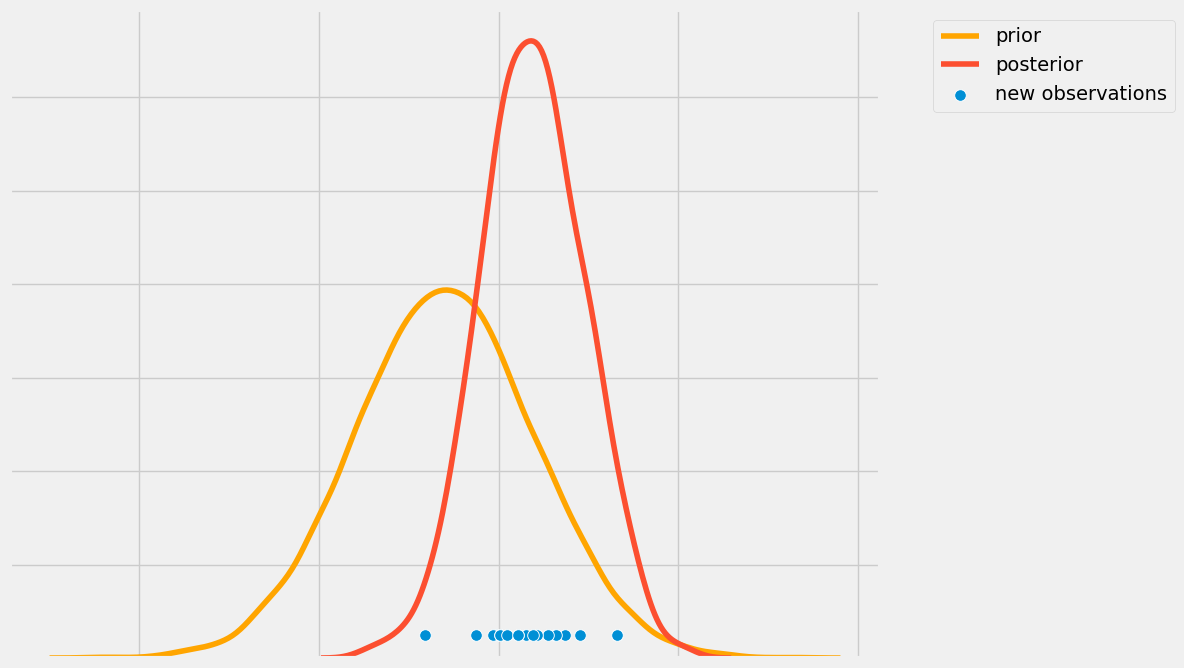

In [250]:
np.random.seed(42)

_ = plt.figure(figsize=(10, 8))

prior = np.random.normal(7, 5, 10000)
posterior = np.random.normal(12, 3, 1000)

sns.kdeplot(prior, label="prior", color="orange")
sns.kdeplot(posterior, label="posterior", color="#fc4f30")

data = np.random.randn(100, 4).cumsum(axis=0)
evidence = pd.DataFrame({
    "y": [.005]*20,
    "x": np.random.normal(12, 3, 20),
})

sns.scatterplot(data=evidence, x="x", y="y", label="new observations", s=70)
_ = plt.xlabel("")
_ = plt.ylabel("")
_ = plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
_ = plt.legend(bbox_to_anchor=(1.35, 1))

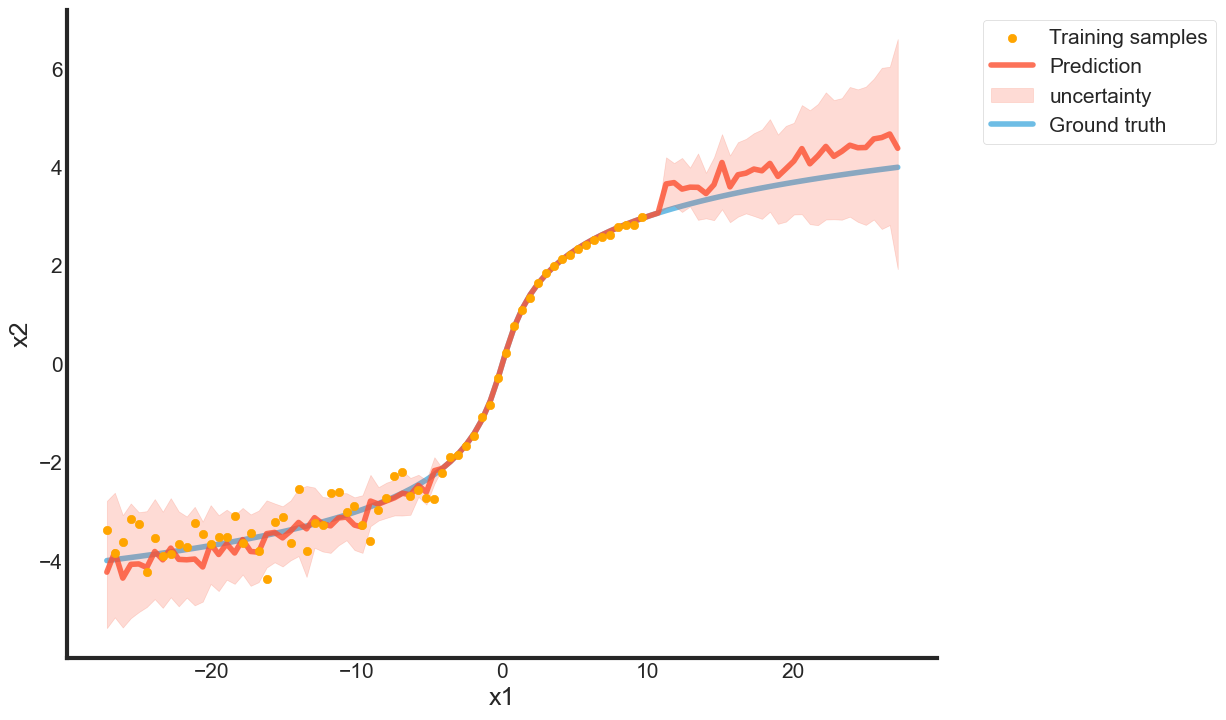

In [295]:
sns.set_style("ticks")
np.random.seed(42)

plt.rcParams['font.size'] = '15'
# plt.style.use('fivethirtyeight')

_ = plt.figure(figsize=(10, 8))

plt.scatter(x[:-32], y_aleatoric[:-32], color="orange", label="Training samples", zorder=10)
sns.lineplot(data=data, x="x", y="y_reg", color="#fc4f30", label="Prediction", alpha=.8, zorder=5, err_kws={"label":"uncertainty", "alpha":.2})
plt.plot(x, y_true, label="Ground truth", color="#30a2da", alpha=.7, zorder=0)

_ = plt.xlabel("x1")
_ = plt.ylabel("x2")
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
_ = plt.grid(False)
_ = plt.legend(bbox_to_anchor=(1.04, 1))

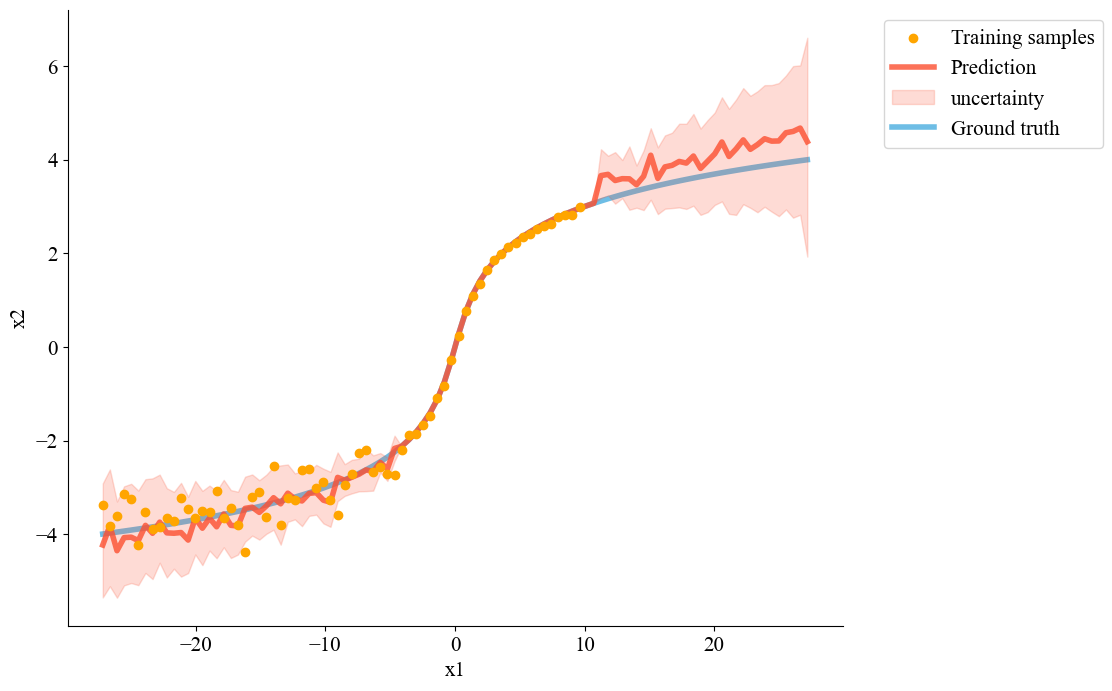

In [19]:
_ = plt.figure(figsize=(10, 8))

plt.scatter(x[:-32], y_aleatoric[:-32], color="orange", label="Training samples", zorder=10)
sns.lineplot(data=data, x="x", y="y_reg", color="#fc4f30", label="Prediction", alpha=.8, zorder=5, linewidth=4, err_kws={"label":"uncertainty", "alpha":.2})
plt.plot(x, y_true, label="Ground truth", color="#30a2da", alpha=.7, zorder=0, linewidth=4)

_ = plt.xlabel("x1")
_ = plt.ylabel("x2")
ax = plt.gca()
plt.box(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
_ = plt.grid(False)
_ = plt.legend(bbox_to_anchor=(1.04, 1))

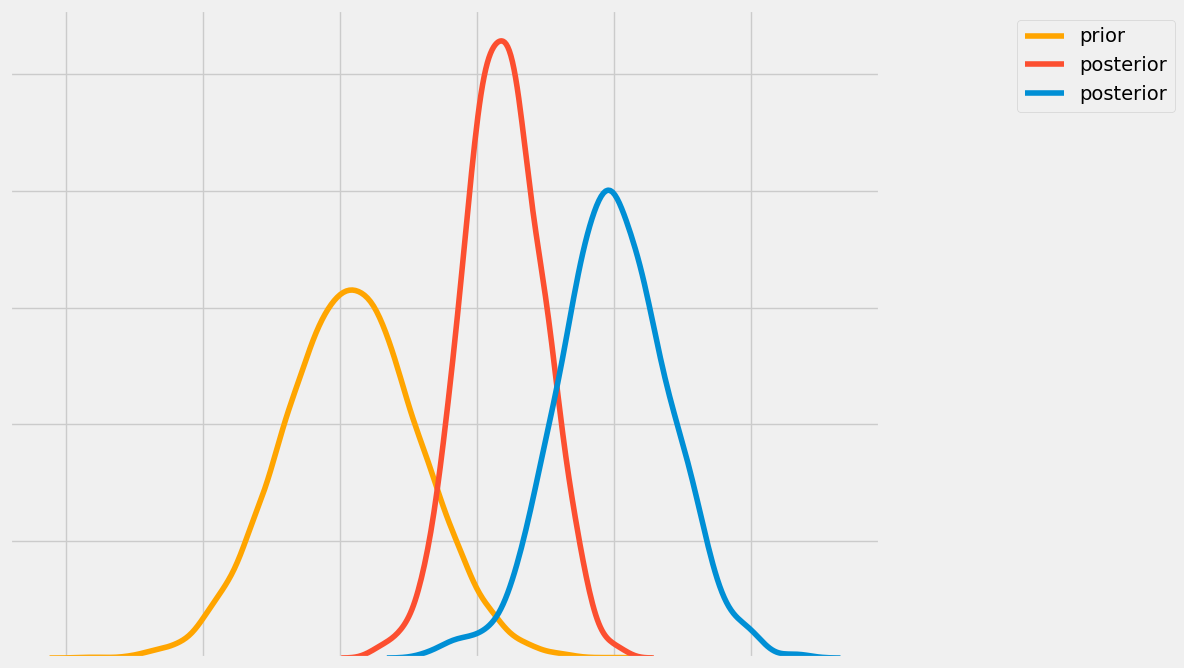

In [269]:
np.random.seed(42)

_ = plt.figure(figsize=(10, 8))

prior = np.random.normal(4, 25, 10000)
posterior = np.random.normal(60, 15, 1000)
evidence = np.random.normal(100, 20, 1000)


sns.kdeplot(prior, label="prior", color="orange")
sns.kdeplot(posterior, label="posterior", color="#fc4f30")
sns.kdeplot(evidence, label="posterior")

_ = plt.xlabel("")
_ = plt.ylabel("")
_ = plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
_ = plt.legend(bbox_to_anchor=(1.35, 1))

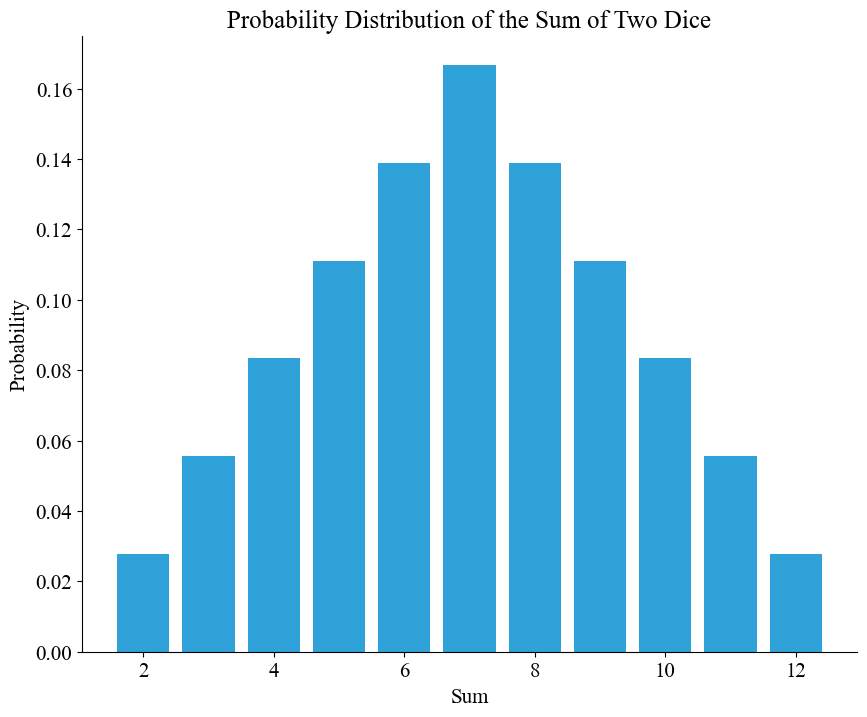

In [2]:
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '15'

dice1, dice2 = np.meshgrid(np.arange(1, 7), np.arange(1, 7))
dice_rolls = np.array([dice1.flatten(), dice2.flatten()]).T

dice_rolls_df = pd.DataFrame(dice_rolls, columns=["dice1", "dice2"])

dice_rolls_df["sum"] = dice_rolls_df["dice1"] + dice_rolls_df["dice2"]

probability_distribution = dice_rolls_df["sum"].value_counts().sort_index() / len(dice_rolls_df)

_ = plt.figure(figsize=(10, 8))

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
_ = plt.grid(False)

plt.bar(probability_distribution.index, probability_distribution.values, color="#30a2da")
plt.xlabel("Sum")
plt.ylabel("Probability")
plt.title("Probability Distribution of the Sum of Two Dice")
plt.show()

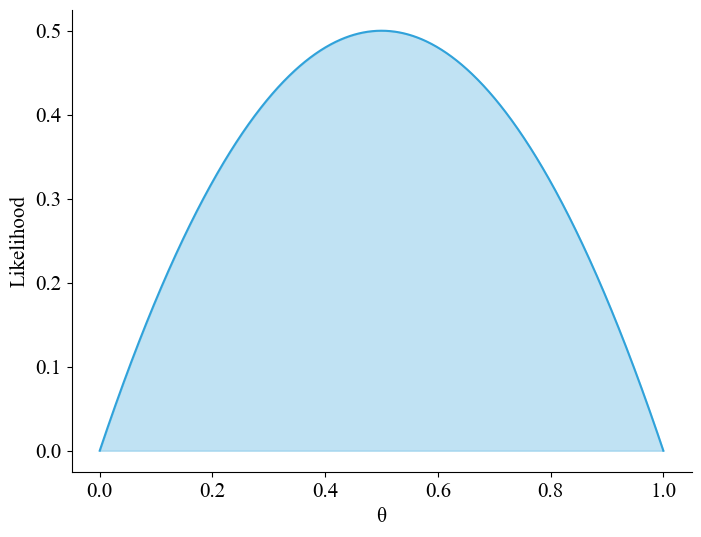

In [10]:
def f(x):
    return 2 * x * (1 - x)

x_values = np.linspace(0, 1, 1000)
y_values = f(x_values)

_ = plt.figure(figsize=(8, 6))

plt.plot(x_values, y_values, color="#30a2da")
plt.fill_between(x_values, y_values, color="#30a2da", alpha=0.3)

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("θ")
plt.ylabel("Likelihood")
_ = plt.grid(False)

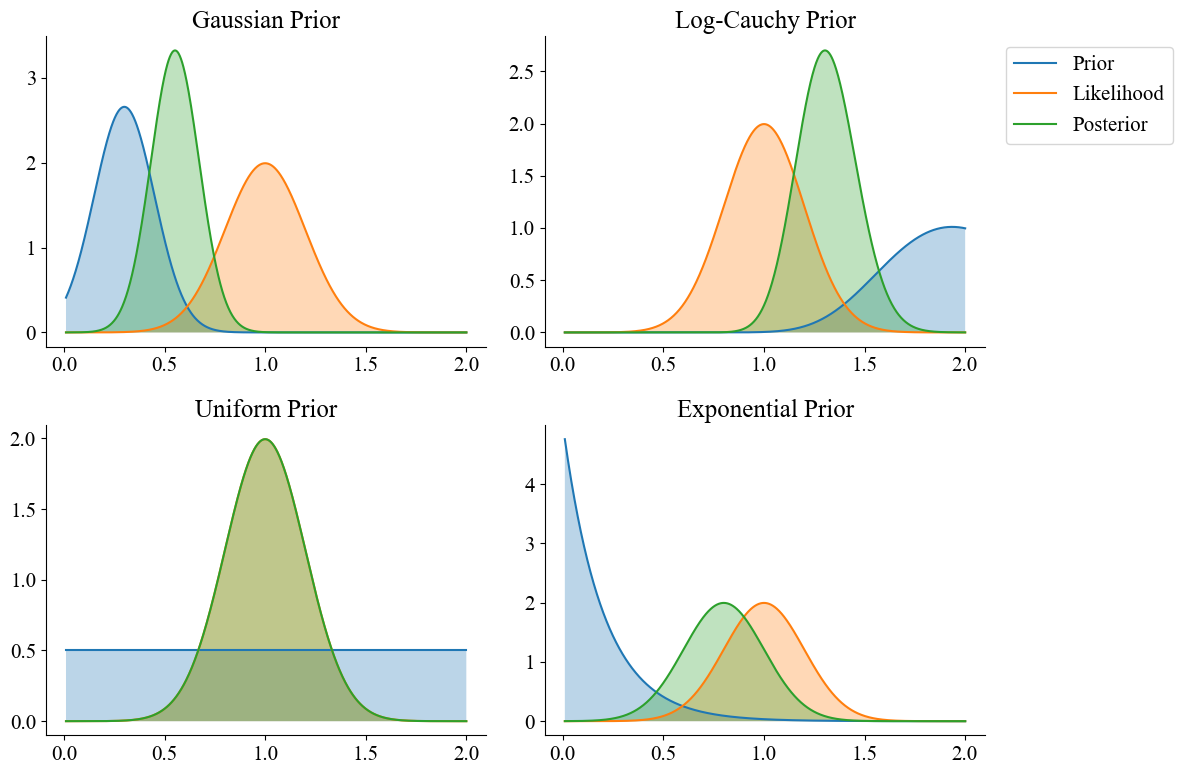

In [91]:
theta = np.linspace(0.01, 2, 1000)

likelihood_params = {'loc': 1, 'scale': 0.2}
likelihood = norm.pdf(theta, loc=likelihood_params['loc'], scale=likelihood_params['scale'])

# Prior 1: Gaussian
prior1_params = {'loc': .3, 'scale': 0.15}
prior1 = norm.pdf(theta, loc=prior1_params['loc'], scale=prior1_params['scale'])
posterior1 = prior1 * likelihood
posterior1 = posterior1 / np.trapz(posterior1, theta)

# Prior 2: Log-Cauchy
prior2_params = {'loc': .7, 'scale': 0.2}
prior2 = lognorm.pdf(theta, s=prior2_params['scale'], scale=np.exp(prior2_params['loc']))
posterior2 = prior2 * likelihood
posterior2 = posterior2 / np.trapz(posterior2, theta)

# Prior 3: Uniform
prior3_params = {'loc': 0, 'scale': 2}
prior3 = uniform.pdf(theta, loc=prior3_params['loc'], scale=prior3_params['scale'])
posterior3 = prior3 * likelihood
posterior3 = posterior3 / np.trapz(posterior3, theta)

# Prior 4: Exponential
prior4_params = {'scale': .2}
prior4 = expon.pdf(theta, scale=prior4_params['scale'])
posterior4 = prior4 * likelihood
posterior4 = posterior4 / np.trapz(posterior4, theta)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Gaussian prior
axes[0, 0].plot(theta, prior1, label='Prior')
axes[0, 0].fill_between(theta, 0, prior1, alpha=0.3)
axes[0, 0].plot(theta, likelihood, label='Likelihood')
axes[0, 0].fill_between(theta, 0, likelihood, alpha=0.3)
axes[0, 0].plot(theta, posterior1, label='Posterior')
axes[0, 0].fill_between(theta, 0, posterior1, alpha=0.3)
axes[0, 0].set_title('Gaussian Prior')

# Log-Cauchy prior
axes[0, 1].plot(theta, prior2, label='Prior')
axes[0, 1].fill_between(theta, 0, prior2, alpha=0.3)
axes[0, 1].plot(theta, likelihood, label='Likelihood')
axes[0, 1].fill_between(theta, 0, likelihood, alpha=0.3)
axes[0, 1].plot(theta, posterior2, label='Posterior')
axes[0, 1].fill_between(theta, 0, posterior2, alpha=0.3)
axes[0, 1].set_title('Log-Cauchy Prior')

# Uniform prior
axes[1, 0].plot(theta, prior3, label='Prior')
axes[1, 0].fill_between(theta, 0, prior3, alpha=0.3)
axes[1, 0].plot(theta, likelihood, label='Likelihood')
axes[1, 0].fill_between(theta, 0, likelihood, alpha=0.3)
axes[1, 0].plot(theta, posterior3, label='Posterior')
axes[1, 0].fill_between(theta, 0, posterior3, alpha=0.3)
axes[1, 0].set_title('Uniform Prior')

# Exponential prior
axes[1, 1].plot(theta, prior4, label='Prior')
axes[1, 1].fill_between(theta, 0, prior4, alpha=0.3)
axes[1, 1].plot(theta, likelihood, label='Likelihood')
axes[1, 1].fill_between(theta, 0, likelihood, alpha=0.3)
axes[1, 1].plot(theta, posterior4, label='Posterior')
axes[1, 1].fill_between(theta, 0, posterior4, alpha=0.3)
axes[1, 1].set_title('Exponential Prior')
axes[0, 1].legend(bbox_to_anchor=(1.45, 1))
plt.tight_layout()

for ax in np.ravel(axes):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

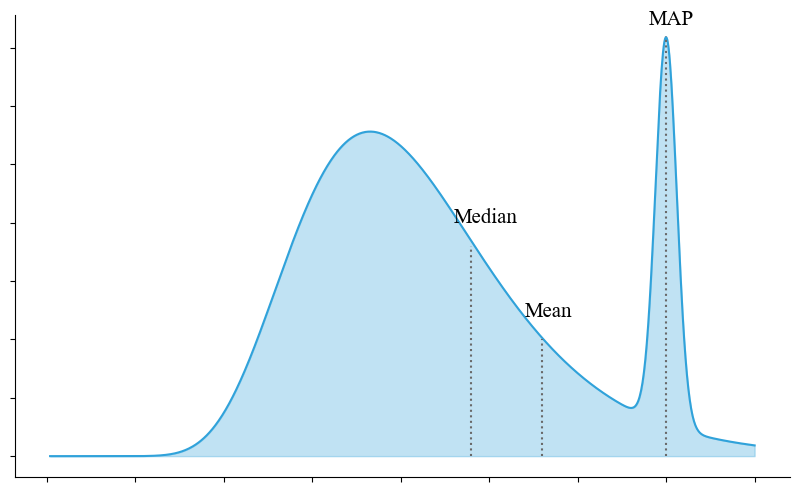

In [87]:
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '15'

theta = np.linspace(0.01, 2, 1000)

prior1_params = {'loc': 1.75, 'scale': 0.03}
prior1 = norm.pdf(theta, loc=prior1_params['loc'], scale=prior1_params['scale'])

prior2_params = {'loc': .0, 'scale': 0.3}
prior2 = lognorm.pdf(theta, s=prior2_params['scale'], scale=np.exp(prior2_params['loc']))

dist3 = (prior1/8) + prior2


_ = plt.figure(figsize=(10, 6))

plt.plot(theta, dist3, label='Prior', color="#30a2da")
plt.fill_between(theta, 0, dist3, alpha=0.3, color="#30a2da")

plt.vlines(x=1.75, ymin = 0, ymax=1.8, colors = 'dimgray', linestyles ="dotted")
plt.text(1.7, 1.85, 'MAP')

x = 1.4
plt.vlines(x=x, ymin = 0, ymax=.5, colors = 'dimgray', linestyles ="dotted")
plt.text(x - .05, .6, 'Mean')

x = 1.2
plt.vlines(x=x, ymin = 0, ymax=.9, colors = 'dimgray', linestyles ="dotted")
plt.text(x - .05, 1, 'Median')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
_ = plt.grid(False)

_ = plt.tick_params(
    labelleft=False, labelbottom=False
)

In [70]:
dist3.mean(), np.median(dist3)

(0.5595480971908211, 0.41691927572205456)